## Trabajo Fin de Grado
### Gestor de Quirófanos
### Implementación de Algoritmo Genético para asignación de quirófanos

#### Autor: Jesús García Armario

In [9]:
# Imports necesarios
import numpy as np
import pandas as pd
from Genetico import Genetico
import sys
sys.path.append('../')
from Heuristicas.Utils import Quirofano, ActoQuirurgico, Heuristicas
import random
import matplotlib.pyplot as plt
import time

In [10]:
# Importamos el listado preprocesado de una especialidad para las pruebas
filename = '..\\..\\Datos\\Listados_Preprocesados\\ListadoInterv_Preprocesado_MAXILOFACIAL.xlsx'
df = pd.read_excel(filename)
# Seleccionamos una muestra aleatoria de 100 pacientes
df = df.sample(n=100, random_state=1)

In [11]:
# Iniciamos
gen = Genetico(df)

C:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Optimizacion\Genético\Genetico.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PONDERACIÓN'] = df['PONDERACIÓN'].astype(int)
C:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Optimizacion\Genético\Genetico.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DURACIÓN'] = df['DURACIÓN'].astype(float)
C:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Optimizacion\Genético\Genetico.py:85: SettingWithCopyWarnin

In [12]:
# Contador de tiempo
start_time = time.time()
N = 200
# Cargamos el algoritmo genético
poblacion, logbook, hof = gen.realiza_evolucion(N, probabilidad_cruce=0.85, probabilidad_mutacion=0.15, numero_generaciones=1000, heur = False)
final_time = time.time() - start_time

gen	evals	avg    	std    	min       	max
0  	200  	3.98003	1.69686	0.00306592	9  
1  	200  	2.69011	1.20968	0.00306592	7  
2  	200  	1.74028	0.975408	0.00306592	5  
3  	200  	1.06583	0.811799	0.00306592	4  
4  	200  	0.621677	0.680826	0.00303336	3  
5  	200  	0.297708	0.66059 	0.00306016	4  
6  	200  	0.107988	0.391597	0.00306016	3  
7  	200  	0.187766	0.582883	0.00304943	3  
8  	200  	0.132774	0.471571	0.00304943	4  
9  	200  	0.0779104	0.359081	0.00304014	3  
10 	200  	0.177693 	0.522909	0.00304014	3  
11 	200  	0.122827 	0.47426 	0.00304014	4  
12 	200  	0.102824 	0.386569	0.00303986	3  
13 	200  	0.127819 	0.508597	0.00303743	4  
14 	200  	0.0878921	0.432763	0.00303743	4  
15 	200  	0.122813 	0.452687	0.0029574 	3  
16 	200  	0.0928567	0.376014	0.0029574 	2  
17 	200  	0.152776 	0.553776	0.0029574 	4  
18 	200  	0.0928112	0.348417	0.0029574 	2  
19 	200  	0.117777 	0.459496	0.0029574 	4  
20 	200  	0.127709 	0.434394	0.00293838	3  
21 	200  	0.132709 	0.460865	0.00293301	3  
22 	20

In [13]:
print("Mejor individuo: ", hof[0])
print("Fitness del mejor: ", hof[0].fitness.values[0])
print("Tiempo de ejecución: ", final_time)

Mejor individuo:  [72, 32, 33, 'A', 89, 21, 78, 86, 'A', 63, 19, 77, 37, 23, 51, 59, 17, 'A', 'B', 92, 88, 15, 47, 40, 'A', 91, 13, 58, 'A', 82, 5, 34, 8, 'A', 'B', 26, 35, 24, 84, 83, 29, 'A', 44, 11, 62, 56, 0, 'A', 52, 79, 66, 'A', 'B', 76, 69, 46, 90, 43, 45, 'V', 50, 'A', 18, 9, 6, 25, 48, 'A', 60, 94, 53, 'A', 'B', 31, 49, 28, 'A', 85, 22, 16, 80, 39, 'A', 70, 42, 67, 2, 'V', 57, 'V', 30, 'A', 'B']
Fitness del mejor:  0.0028974280430046464
Tiempo de ejecución:  4.24970006942749


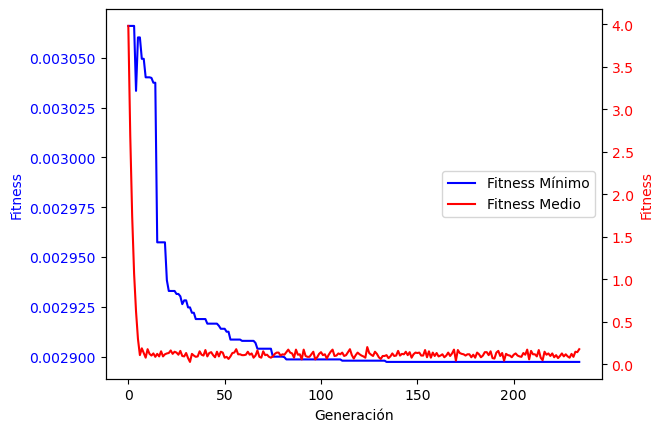

In [14]:
gen.representaAlgoritmoGenetico(logbook)

Incluimos las heurísticas como parte de la población inicial

In [15]:
# Contador de tiempo
start_time = time.time()
poblacion, logbook, hof_comb = gen.realiza_evolucion(200, probabilidad_cruce=0.85, probabilidad_mutacion=0.15, numero_generaciones=1000, heur = True)
final_time = time.time() - start_time

gen	evals	avg    	std    	min       	max
0  	200  	4.01503	1.60141	0.00250006	9  
1  	200  	2.84003	1.11994	0.00250006	5  
2  	200  	1.99003	0.806102	0.00250006	4  
3  	200  	1.46506	0.74739 	0.00250006	6  
4  	200  	1.0652 	0.548041	0.00250006	4  
5  	200  	0.885462	0.548596	0.00249537	4  
6  	200  	0.651025	0.621425	0.00249537	3  
7  	200  	0.321825	0.571343	0.00249537	3  
8  	200  	0.0723496	0.30785 	0.00248822	3  
9  	200  	0.107337 	0.428351	0.00248767	3  
10 	200  	0.152272 	0.506773	0.00248453	3  
11 	200  	0.112308 	0.42118 	0.00248453	3  
12 	200  	0.0972943	0.339911	0.00248453	2  
13 	200  	0.102331 	0.399417	0.00248453	2  
14 	200  	0.102314 	0.386701	0.00248279	2  
15 	200  	0.107289 	0.378807	0.00248279	2  
16 	200  	0.117312 	0.459613	0.00247423	3  
17 	200  	0.127273 	0.456954	0.00247423	3  
18 	200  	0.0873712	0.444266	0.00247423	4  
19 	200  	0.147221 	0.483044	0.00247423	4  
20 	200  	0.197194 	0.596758	0.00247423	3  
21 	200  	0.102303 	0.411752	0.00247423	3  
22 	20

Mejor individuo:  [40, 33, 74, 46, 37, 26, 'V', 0, 'A', 15, 88, 60, 43, 'V', 4, 'A', 6, 39, 59, 29, 28, 'A', 'B', 73, 1, 32, 35, 'A', 49, 11, 62, 'A', 2, 92, 75, 56, 96, 'V', 50, 'A', 'B', 72, 10, 61, 12, 'A', 95, 64, 91, 63, 13, 'A', 8, 27, 48, 76, 93, 51, 'A', 'B', 3, 45, 'V', 22, 'A', 81, 57, 68, 16, 'A', 79, 44, 53, 34, 'A', 'B', 70, 67, 99, 85, 25, 38, 'A', 86, 80, 89, 17, 90, 19, 'A', 7, 77, 42, 'V', 84, 'A', 'B']
Fitness del mejor:  0.0024601580741386055
Tiempo de ejecución:  4.391437768936157


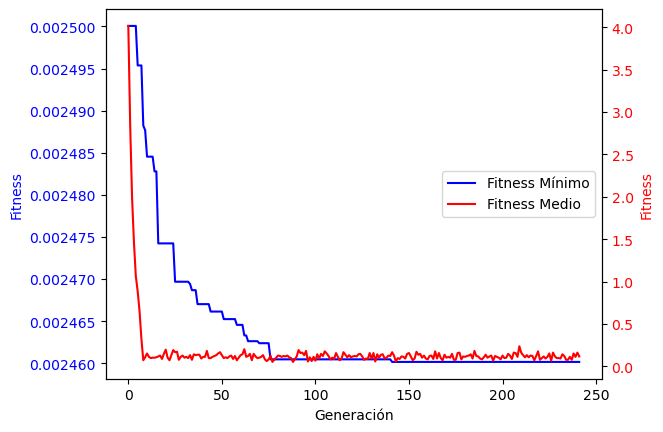

In [16]:
print("Mejor individuo: ", hof_comb[0])
print("Fitness del mejor: ", hof_comb[0].fitness.values[0])
print("Tiempo de ejecución: ", final_time)
gen.representaAlgoritmoGenetico(logbook)

Fitness LPT:  0.004712588354805972
Fitness LPTEDD:  0.004877853334892653
Fitness Combinado:  0.0024601580741386055
Fitness Genético:  0.0028974280430046464


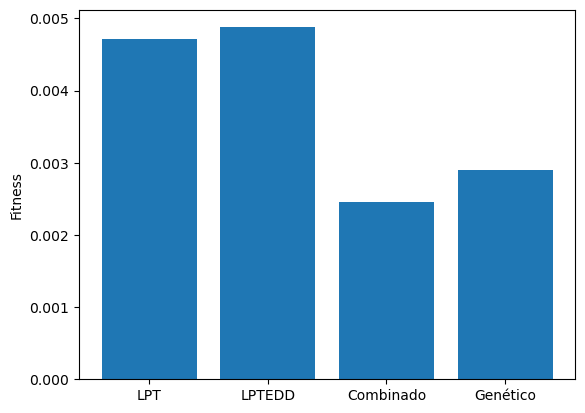

In [17]:
# Se representan los fitness de los mejores individuos
mejor_LPT = gen.toolbox.indModelo()
mejor_LPTEDD = gen.toolbox.indModeloDos()
mejor_comb = hof_comb[0]
mejor_gene = hof[0]

# Se evalúan
mejor_LPT.fitness.values = gen.toolbox.evaluate(mejor_LPT)
mejor_LPTEDD.fitness.values = gen.toolbox.evaluate(mejor_LPTEDD)
mejor_comb.fitness.values = gen.toolbox.evaluate(mejor_comb)
mejor_gene.fitness.values = gen.toolbox.evaluate(mejor_gene)

# Se representan
print("Fitness LPT: ", mejor_LPT.fitness.values[0]) 
print("Fitness LPTEDD: ", mejor_LPTEDD.fitness.values[0])
print("Fitness Combinado: ", mejor_comb.fitness.values[0])
print("Fitness Genético: ", mejor_gene.fitness.values[0])

# Se representan los resultados
def representaResultados(mejor_LPT, mejor_LPTEDD, mejor_comb, mejor_gene):
    # Se representan los resultados
    fig, ax = plt.subplots()
    ax.bar([1,2,3,4],[mejor_LPT.fitness.values[0], mejor_LPTEDD.fitness.values[0], mejor_comb.fitness.values[0], mejor_gene.fitness.values[0]])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(["LPT", "LPTEDD", "Combinado", "Genético"])
    ax.set_ylabel("Fitness")
    plt.show()

representaResultados(mejor_LPT, mejor_LPTEDD, mejor_comb, mejor_gene)